In [1]:
# main function
import numpy as np
import torch
import matplotlib.pyplot as plt

from xopt.mobo import mobo

# test function
from xopt.evaluators import test_TNK

from concurrent.futures import ThreadPoolExecutor as PoolExecutor



{'name': 'TNK_test', 'description': 'Constrainted test function TNK. See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf', 'simulation': 'test_TNK', 'variables': {'x1': [0, 3.14159], 'x2': [0, 3.14159]}, 'objectives': {'y1': 'MINIMIZE', 'y2': 'MINIMIZE'}, 'constraints': {'c1': ['GREATER_THAN', 0], 'c2': ['LESS_THAN', 0.5]}, 'constants': {'a': 'dummy_constant'}, 'linked_variables': {'x9': 'x1'}}
n_feas: 0
n_feas: 2
n_feas: 5
n_feas: 8
n_feas: 10
n_feas: 13
n_feas: 15
n_feas: 18
n_feas: 19
n_feas: 20
n_feas: 20
n_feas: 20
n_feas: 20
n_feas: 21
n_feas: 25
n_feas: 27
n_feas: 31
n_feas: 35
n_feas: 38
n_feas: 42
n_feas: 42


c:\users\ryan roussel\documents\github\xopt\xopt\mobo.py:139: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pts = torch.tensor(np.vstack((ele.ravel() for ele in xx)).T, **tkwargs)
c:\users\ryan roussel\documents\github\xopt\xopt\mobo.py:166: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolor(*xx, ehvi.reshape(n, n))
c:\users\ryan roussel\documents\github\xopt\xopt\mobo.py:173: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X an

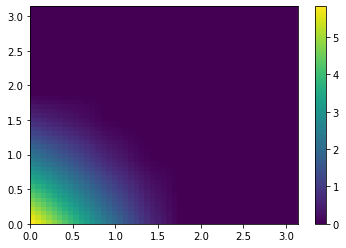

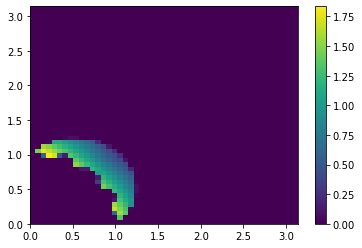

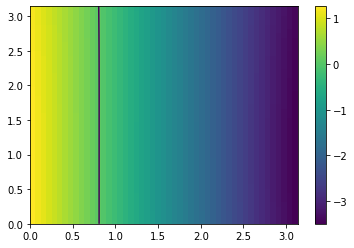

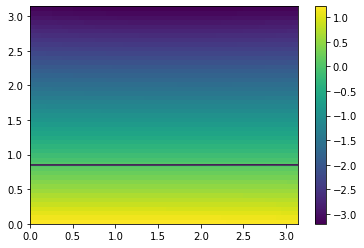

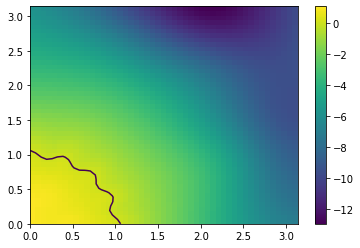

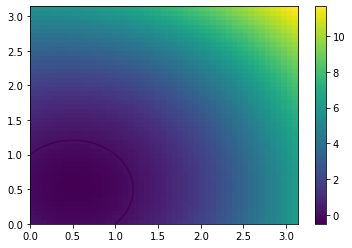

In [5]:
# Get VOCS
VOCS = test_TNK.VOCS

# add reference point
ref = torch.tensor((1.4, 1.4))

print(VOCS)
# Get evaluate function
EVALUATE = test_TNK.evaluate_TNK

# Run
executor = PoolExecutor()

init_x = torch.tensor([[0.9, 0.9], [0.6, 0.6]])
train_x, train_y, train_c = mobo(VOCS, EVALUATE, ref,
                                 batch_size=4,
                                 executor=executor,
                                 n_initial_samples=10,
                                 mc_samples=128, initial_x=None,
                                 use_gpu=False,
                                 n_steps=20, verbose=False, plot_acq=True)

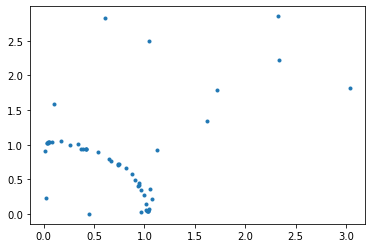

In [4]:
fig, ax = plt.subplots()
ax.plot(train_y[:, 0], train_y[:, 1], '.')

plt.show()